In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#display two decimal places
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_excel(r'C:\Users\abrahamp\OneDrive - Hewlett Packard Enterprise\Documents\Personal Stuff\Class Notes\Data Science Course\Python for Data Science\eda-ev.xlsx', sheet_name = 'Electric_Vehicle_Population_Dat')
df.shape

(177866, 17)

In [4]:
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.00,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.00,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007800.00
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.00,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.00,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,53061051938.00


In [5]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [15]:
df['Postal Code'] = df['Postal Code'].apply(np.int64)
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                            int64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [6]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [7]:
# there are NULL values and we need to take some action on it - impute or delete
# since the NULLS are very few # missing is a small fraction we will delete it

In [8]:
df = df.dropna()
df.shape

(177473, 17)

In [25]:
adoptionbyyear = df['Model Year'].value_counts().sort_index()

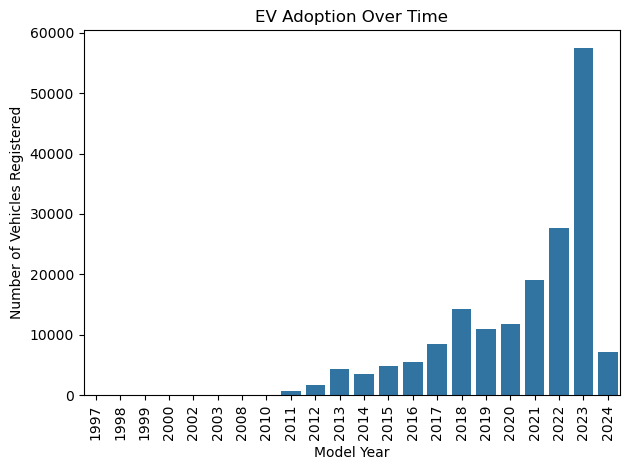

In [21]:
sns.barplot(x=adoptionbyyear.index, y=adoptionbyyear.values)
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [22]:
evtype = df['Electric Vehicle Type'].value_counts()
evtype

Electric Vehicle Type
Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: count, dtype: int64

In [26]:
ratioevtype = 138947 / 38526
ratioevtype

3.606577376317292

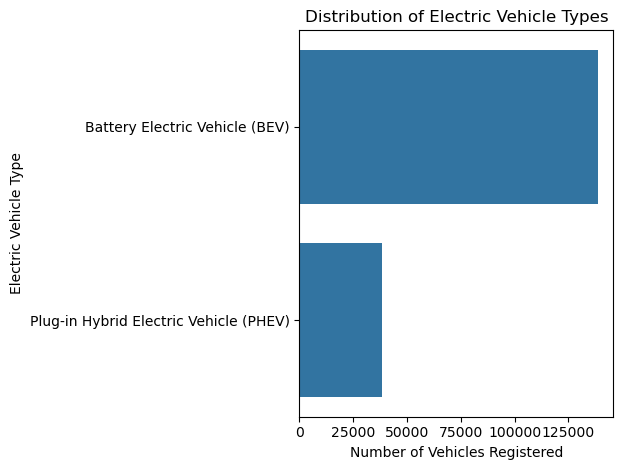

In [23]:
sns.barplot(x=evtype.values, y=evtype.index)
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

In [46]:
make = df['Make'].value_counts().head(10)
make

Make
TESLA         79471
NISSAN        13984
CHEVROLET     13651
FORD           9177
BMW            7556
KIA            7423
TOYOTA         6254
VOLKSWAGEN     4993
JEEP           4468
HYUNDAI        4398
Name: count, dtype: int64

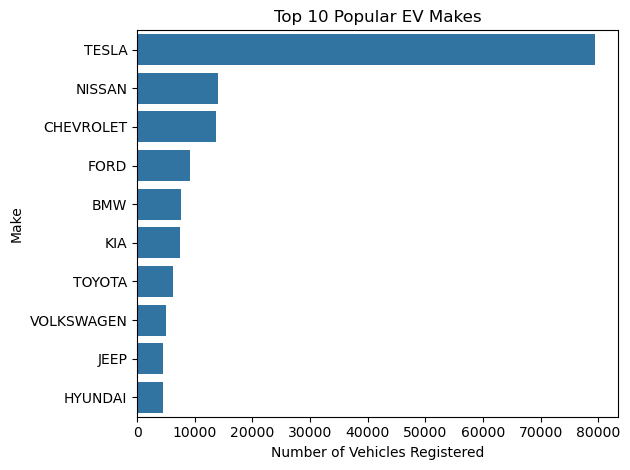

In [24]:
make = df['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

sns.barplot(x=make.values, y=make.index)
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

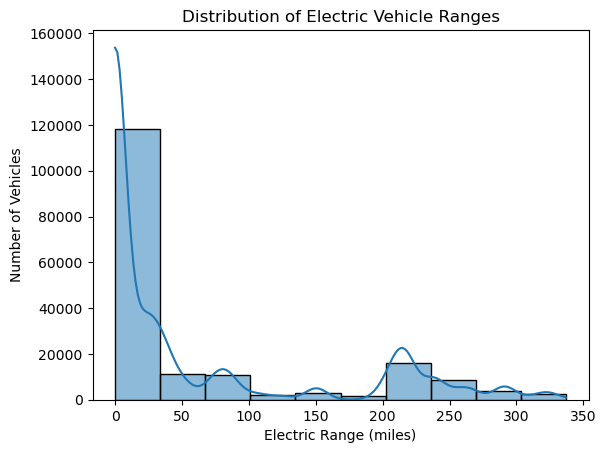

In [43]:
sns.histplot(df['Electric Range'], bins=10, kde=True)
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
#plt.axvline(df['Electric Range'].mean(), color='red')
plt.show()

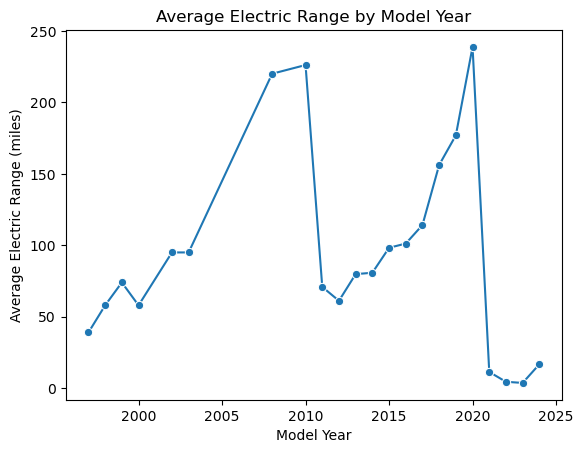

In [31]:
range = df.groupby('Model Year')['Electric Range'].mean().reset_index()

sns.lineplot(x='Model Year', y='Electric Range', data=range, marker='o')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.show()

In [40]:
elegibility = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().head(10)
elegibility

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    91790
Clean Alternative Fuel Vehicle Eligible                         66166
Not eligible due to low battery range                           19517
Name: count, dtype: int64

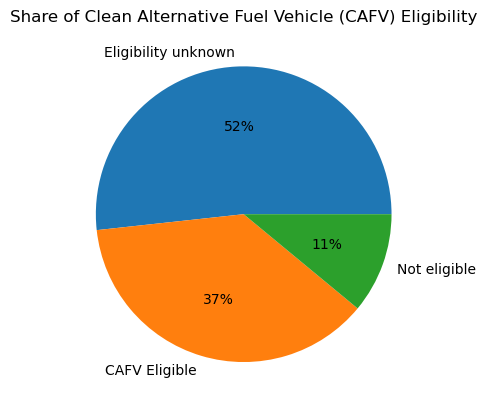

In [44]:
# declaring data 
data = [91790, 66166, 19517] 
label = ['Eligibility unknown', 'CAFV Eligible', 'Not eligible'] 
plt.title('Share of Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.pie(data, labels=label, autopct='%.0f%%') 
plt.show() 